In [261]:
import pandas as pd
import numpy as np
import shapely
from shapely.geometry import shape, mapping
import geopandas as gpd
from geopandas.tools import sjoin
import requests 
import json
import matplotlib.pyplot as plt

In [262]:
print('Necessary libraries have been imported successfully.')

Necessary libraries have been imported successfully.


In [263]:
tracts2016 = pd.read_csv('2016alltractdata.csv')
tracts2019 = pd.read_csv('2019alltractdata.csv')

In [264]:
tracts2016.columns

Index(['id', 'Geographic Area Name', 'Estimate!!SEX AND AGE!!Total population',
       'Estimate!!SEX AND AGE!!18 years and over',
       'Percent!!SEX AND AGE!!18 years and over', 'Latino Total Population',
       'Percent!!HISPANIC OR LATINO AND RACE!!Total population',
       'Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)',
       'Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)',
       'Percent Margin of Error!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)',
       'Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Mexican',
       'Margin of Error!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Mexican',
       'Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Mexican',
       'Percent Margin of Error!!HISPANIC OR LATINO AND RACE!!Total population!!

In [265]:
proct16 = tracts2016[['Geographic Area Name','Estimate!!SEX AND AGE!!Total population','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Mexican','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Puerto Rican','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Cuban','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Other Hispanic or Latino']]

In [266]:
 tracts2019.columns

Index(['id', 'Geographic Area Name', 'Estimate!!SEX AND AGE!!Total population',
       'Estimate!!HISPANIC OR LATINO AND RACE!!Total population',
       'Margin of Error!!HISPANIC OR LATINO AND RACE!!Total population',
       'Percent!!HISPANIC OR LATINO AND RACE!!Total population',
       'Percent Margin of Error!!HISPANIC OR LATINO AND RACE!!Total population',
       'Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)',
       'Margin of Error!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)',
       'Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)',
       'Percent Margin of Error!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)',
       'Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Mexican',
       'Margin of Error!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!

In [267]:
proct19 = tracts2019[['Geographic Area Name','Estimate!!SEX AND AGE!!Total population','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Mexican','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Puerto Rican','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Cuban','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Other Hispanic or Latino']]

In [268]:
proct19.columns

Index(['Geographic Area Name', 'Estimate!!SEX AND AGE!!Total population',
       'Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)',
       'Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Mexican',
       'Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Puerto Rican',
       'Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Cuban',
       'Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Other Hispanic or Latino'],
      dtype='object')

In [269]:
proct16 = proct16.rename(columns = {'Geographic Area Name':'Tract','Estimate!!SEX AND AGE!!Total population':'Total Population 2016','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)':'LatinX Population 2016','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Mexican':'Mexican 2016','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Puerto Rican':'Puerto Rican 2016','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Cuban':'Cuban 2016','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Other Hispanic or Latino':'Other LatinX 2016'})
proct19 = proct19.rename(columns = {'Geographic Area Name':'Tract','Estimate!!SEX AND AGE!!Total population':'Total Population 2019','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)':'LatinX Population 2019','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Mexican':'Mexican 2019','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Puerto Rican':'Puerto Rican 2019','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Cuban':'Cuban 2019','Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)!!Other Hispanic or Latino':'Other LatinX 2019'})

In [270]:
proct16['Tract'] = proct16['Tract'].astype(str)
proct19['Tract'] = proct19['Tract'].astype(str)

In [271]:
proct16

,Tract,Total Population 2016,LatinX Population 2016,Mexican 2016,Puerto Rican 2016,Cuban 2016,Other LatinX 2016
0,101.0,2962,164,0,105,0,59
1,102.06,3168,10,1,1,0,8
2,102.08,1589,30,17,0,0,13
3,103.04,2107,23,7,0,6,10
4,103.06,2817,53,0,0,0,53
...,...,...,...,...,...,...,...
1473,7601.0,3386,0,0,0,0,0
1474,7611.0,5178,42,0,41,0,1
1475,7612.0,5541,397,101,95,0,201
1476,7613.0,3397,515,9,471,11,24


In [272]:
type(proct19)

pandas.core.frame.DataFrame

In [273]:
merged = pd.merge(proct16,proct19, how = "left", left_on = ['Tract'],right_on =['Tract'])

In [274]:
merged

,Tract,Total Population 2016,LatinX Population 2016,Mexican 2016,Puerto Rican 2016,Cuban 2016,Other LatinX 2016,Total Population 2019,LatinX Population 2019,Mexican 2019,Puerto Rican 2019,Cuban 2019,Other LatinX 2019
0,101.0,2962,164,0,105,0,59,2973,124,6,23,32,63
1,102.06,3168,10,1,1,0,8,3617,44,0,0,26,18
2,102.08,1589,30,17,0,0,13,1122,17,17,0,0,0
3,103.04,2107,23,7,0,6,10,2394,20,0,0,14,6
4,103.06,2817,53,0,0,0,53,2507,23,0,0,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,7601.0,3386,0,0,0,0,0,3441,1,0,0,0,1
1498,7611.0,5178,42,0,41,0,1,5213,62,0,0,0,62
1499,7612.0,5541,397,101,95,0,201,5506,483,154,20,0,309
1500,7613.0,3397,515,9,471,11,24,3259,341,0,161,50,130


In [275]:
permerged = merged.copy()

In [276]:
permerged['% Change in Total Pop.'] = (permerged['Total Population 2019']-permerged['Total Population 2016'])/permerged['Total Population 2016']

In [277]:
permerged['% Change in LatinX Pop.'] = (permerged['LatinX Population 2019']-permerged['LatinX Population 2016'])/permerged['LatinX Population 2016']

In [278]:
permerged['% Change in Mexican Pop.'] = (permerged['Mexican 2019']-permerged['Mexican 2016'])/permerged['Mexican 2016']

In [279]:
permerged['% Change in Puerto Rican Pop.'] = (permerged['Puerto Rican 2019']-permerged['Puerto Rican 2016'])/permerged['Puerto Rican 2016']

In [280]:
permerged['% Change in Cuban Pop.'] = (permerged['Cuban 2019']-permerged['Cuban 2016'])/permerged['Cuban 2016']

In [281]:
permerged['% Change in Other LatinX Pop.'] = (permerged['Other LatinX 2019']-permerged['Other LatinX 2016'])/permerged['Other LatinX 2016']

In [282]:
permerged = permerged[['Tract','% Change in LatinX Pop.','% Change in Mexican Pop.','% Change in Puerto Rican Pop.','% Change in Cuban Pop.','% Change in Other LatinX Pop.','% Change in Total Pop.']]

In [283]:
permerged

,Tract,% Change in LatinX Pop.,% Change in Mexican Pop.,% Change in Puerto Rican Pop.,% Change in Cuban Pop.,% Change in Other LatinX Pop.,% Change in Total Pop.
0,101.0,-0.243902,inf,-0.780952,inf,0.067797,0.003714
1,102.06,3.400000,-1.000000,-1.000000,inf,1.250000,0.141730
2,102.08,-0.433333,0.000000,NaN,NaN,-1.000000,-0.293896
3,103.04,-0.130435,-1.000000,NaN,1.333333,-0.400000,0.136213
4,103.06,-0.566038,NaN,NaN,NaN,-0.566038,-0.110046
...,...,...,...,...,...,...,...
1497,7601.0,inf,NaN,NaN,NaN,inf,0.016243
1498,7611.0,0.476190,NaN,-1.000000,NaN,61.000000,0.006759
1499,7612.0,0.216625,0.524752,-0.789474,NaN,0.537313,-0.006317
1500,7613.0,-0.337864,-1.000000,-0.658174,3.545455,4.416667,-0.040624


In [284]:
permerged['Latitude'] = -40.266666
permerged['Longitude'] = 72.3452

In [285]:
from geopy.geocoders import Nominatim

In [286]:
permerged = gpd.GeoDataFrame(
    permerged, geometry=gpd.points_from_xy(permerged.Longitude, permerged.Latitude))

In [287]:
type(permerged)

geopandas.geodataframe.GeoDataFrame

In [288]:
MA_t = gpd.read_file("CENSUS2010TRACTS_POLY.shp")

In [289]:
MA_t['NAME10']

0       4180.03
1       4177.01
2       4177.02
3       4181.02
4       4180.04
         ...   
1467    7095.01
1468    7095.02
1469    7308.01
1470       7108
1471       7326
Name: NAME10, Length: 1472, dtype: object

In [290]:
MA_t.NAME10 = MA_t.NAME10.astype(float).astype(str)

In [291]:
Tractjoin = gpd.pd.merge(permerged, MA_t, how='left', right_on=['NAME10'], left_on = ['Tract'])

Tractjoin.to_csv("TRACTSPLEASE.csv", encoding = "utf-8")

In [292]:
Tractjoin = Tractjoin.drop(columns = ["Latitude","Longitude","geometry_y"])
Tractjoin = Tractjoin.rename(columns = {"geometry_x":"geometry"})

In [293]:
Tractjoin

,Tract,% Change in LatinX Pop.,% Change in Mexican Pop.,% Change in Puerto Rican Pop.,% Change in Cuban Pop.,% Change in Other LatinX Pop.,% Change in Total Pop.,geometry,STATEFP10,COUNTYFP10,...,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,LOGPL94171,LOGSF1,LOGACS0610,LOGSF1C,SHAPE_AREA,SHAPE_LEN
0,101.0,-0.243902,inf,-0.780952,inf,0.067797,0.003714,POINT (72.34520 -40.26667),25,001,...,2.756219e+08,6327.4075,2942.0,4494.0,0015150,13422.0,0002740,0013422,2.560621e+07,46334.519974
1,102.06,3.400000,-1.000000,-1.000000,inf,1.250000,0.141730,POINT (72.34520 -40.26667),25,001,...,5.658347e+08,12989.7775,2750.0,4305.0,0015156,13428.0,0002741,0013428,5.256797e+07,81419.705965
2,102.08,-0.433333,0.000000,NaN,NaN,-1.000000,-0.293896,POINT (72.34520 -40.26667),25,001,...,6.030155e+08,13843.3306,2003.0,3077.0,0015160,13432.0,0002742,0013432,5.602220e+07,48367.069196
3,103.04,-0.130435,-1.000000,NaN,1.333333,-0.400000,0.136213,POINT (72.34520 -40.26667),25,001,...,2.066006e+08,4742.8976,2421.0,2706.0,0015164,13436.0,0002743,0013436,1.919390e+07,68689.291139
4,103.06,-0.566038,NaN,NaN,NaN,-0.566038,-0.110046,POINT (72.34520 -40.26667),25,001,...,1.928973e+08,4428.3132,2535.0,3254.0,0015168,13440.0,0002744,0013440,1.792082e+07,19147.555020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521,7601.0,inf,NaN,NaN,NaN,inf,0.016243,POINT (72.34520 -40.26667),25,027,...,4.627732e+08,10623.8098,3390.0,1493.0,0190546,172093.0,0004213,0172093,4.299320e+07,32625.081217
1522,7611.0,0.476190,NaN,-1.000000,NaN,61.000000,0.006759,POINT (72.34520 -40.26667),25,027,...,7.707821e+08,17694.7230,5135.0,2211.0,0190550,172097.0,0004214,0172097,7.160829e+07,34469.208131
1523,7612.0,0.216625,0.524752,-0.789474,NaN,0.537313,-0.006317,POINT (72.34520 -40.26667),25,027,...,2.614599e+08,6002.2942,5780.0,2486.0,0190555,172102.0,0004215,0172102,2.429052e+07,25335.083060
1524,7613.0,-0.337864,-1.000000,-0.658174,3.545455,4.416667,-0.040624,POINT (72.34520 -40.26667),25,027,...,1.149699e+08,2639.3459,3059.0,1313.0,0190559,172106.0,0004216,0172106,1.068110e+07,17545.353232


In [294]:
MA_p = gpd.read_file("wardsprecincts_poly/WARDSPRECINCTS_POLY.shp")
#MA_p['WARD'] = MA_p['WARD'].astype(str)

In [295]:
MA_p.dtypes

WP_NAME         object
WARD            object
PRECINCT        object
DISTRICT        object
POP_2010         int64
TOWN            object
TOWN_ID          int64
AREA_SQMI      float64
AREA_ACRES     float64
YEAR             int64
SHAPE_AREA     float64
SHAPE_LEN      float64
geometry      geometry
dtype: object

In [296]:
pres2016 = pd.read_csv('2016PresidentPrecinct.csv')
pres2020 = pd.read_csv('2020PresidentPrecint.csv')

In [297]:
pres2016.dtypes

City/Town            object
Ward                 object
Pct                  object
Clinton/ Kaine        int64
Trump/ Pence          int64
Johnson/ Weld         int64
Stein/ Baraka         int64
Mcmullin/ Johnson     int64
Kotlikoff/ Leamer     int64
Feegbeh/ O'Brien      int64
Moorehead/ Lilly      int64
Schoenke/ Mitchel     int64
All Others            int64
No Preference         int64
Blanks                int64
Total Votes Cast      int64
dtype: object

In [298]:
pres2020

,City/Town,Ward,Precinct,Democratic,Republican,Libertarian,Green-Rainbow,All Others,No Preference,Blanks,Total Votes Cast
0,Abington,-,1,1037,764,29,6,8,0,16,1860
1,Abington,-,2,960,838,23,16,4,0,9,1850
2,Abington,-,3,954,848,31,8,3,0,9,1853
3,Abington,-,4,1117,904,28,7,6,0,26,2088
4,Abington,-,5,1141,882,35,8,3,0,15,2084
...,...,...,...,...,...,...,...,...,...,...,...
2099,Yarmouth,-,3,1145,672,29,13,9,0,8,1876
2100,Yarmouth,-,4,1220,867,22,19,6,0,14,2148
2101,Yarmouth,-,5,1100,848,28,8,1,0,19,2004
2102,Yarmouth,-,6,1145,758,16,11,11,0,18,1959


In [299]:
pres2016 = pres2016.rename(columns = {'Clinton/ Kaine':'Democratic 2016','Trump/ Pence':'Republican 2016'})
pres2016 = pres2016[['City/Town','Pct','Ward','Democratic 2016','Republican 2016','Total Votes Cast']]
pres2020 = pres2020.rename(columns = {'Democratic': 'Democratic 2020','Republican':'Republican 2020','Precinct':'Pct','Total Votes Cast':'Total Votes Cast 2020'})
pres2020 = pres2020[['City/Town','Pct','Ward','Democratic 2020','Republican 2020','Total Votes Cast 2020']]

#pres2016.loc[pres2016['Ward']=='-','Ward'] = 'None'
#pres2020.loc[pres2020['Ward']=='None','Ward'] = '-'
pres2016['City/Town']=pres2016['City/Town'].str.upper()
pres2020['City/Town']=pres2020['City/Town'].str.upper()

In [300]:
pres2016

,City/Town,Pct,Ward,Democratic 2016,Republican 2016,Total Votes Cast
0,Abington,1,-,818,717,1709
1,Abington,2,-,739,785,1671
2,Abington,3,-,773,808,1726
3,Abington,4,-,877,878,1919
4,Abington,5,-,908,829,1887
...,...,...,...,...,...,...
2169,Yarmouth,3,-,904,663,1679
2170,Yarmouth,4,-,1002,860,2038
2171,Yarmouth,5,-,881,797,1805
2172,Yarmouth,6,-,907,753,1804


In [301]:
#pres2016 = pres2016.drop(2175)

In [302]:
#pres2020=pres2020.drop(2318)

In [303]:
pres2020 = pres2020.dropna()
pres2016 = pres2016.dropna()

pres2016['Democratic 2016'] = pres2016['Democratic 2016'].str.replace(',','').astype('float')
pres2016['Republican 2016'] = pres2016['Republican 2016'].str.replace(',','').astype('float')
pres2016['Total Votes Cast'] = pres2016['Total Votes Cast'].str.replace(',','').astype('float')

In [304]:
# pres2016['Ward'] = pres2016['Ward'].astype(str)
# pres2020['Ward'] = pres2020['Ward'].astype(str)
# pres2016['Pct'] = pres2016['Pct'].astype(str)
# pres2016['City/Town'] = pres2016['City/Town'].astype(str)
# pres2020['Pct'] = pres2020['Pct'].astype(str)
# pres2020['City/Town'] = pres2020['City/Town'].astype(str)

In [305]:
#pres2016['Ward'].replace("None", '-', inplace=True)

In [306]:
pres2020.dtypes

City/Town                object
Pct                      object
Ward                     object
Democratic 2020           int64
Republican 2020           int64
Total Votes Cast 2020     int64
dtype: object

In [307]:
pres2016.dtypes

City/Town           object
Pct                 object
Ward                object
Democratic 2016      int64
Republican 2016      int64
Total Votes Cast     int64
dtype: object

In [309]:
pres2016['Ward'] = pres2016['Ward'].str.replace('-','None')
pres2020['Ward'] = pres2020['Ward'].str.replace('-','None')

City/Town           object
Pct                 object
Ward                object
Democratic 2016      int64
Republican 2016      int64
Total Votes Cast     int64
dtype: object

Index(['City/Town', 'Pct', 'Ward', 'Democratic 2016', 'Republican 2016',
       'Total Votes Cast'],
      dtype='object')

In [322]:
mergedP = pd.merge(pres2016,pres2020, on = ['Ward','Pct','City/Town'])

In [323]:
mergedP

,City/Town,Pct,Ward,Democratic 2016,Republican 2016,Total Votes Cast,Democratic 2020,Republican 2020,Total Votes Cast 2020
0,Attleboro,A,1,761,761,1638,1006,800,1861
1,Attleboro,B,1,779,758,1666,1071,806,1925
2,Attleboro,A,2,894,774,1854,1157,813,2037
3,Attleboro,B,2,949,861,1988,1268,942,2295
4,Attleboro,A,3,933,650,1759,1276,753,2089
...,...,...,...,...,...,...,...,...,...
970,Worcester,1,10,651,180,896,675,244,944
971,Worcester,2,10,676,124,875,777,175,992
972,Worcester,3,10,777,89,926,645,194,877
973,Worcester,4,10,612,101,753,525,214,763


In [311]:
other = pd.concat([pres2016,pres2020], axis=1, join="inner")

In [313]:
other

,City/Town,Pct,Ward,Democratic 2016,Republican 2016,Total Votes Cast,City/Town,Pct,Ward,Democratic 2020,Republican 2020,Total Votes Cast 2020
0,Abington,1,None,818,717,1709,Abington,1,None,1037,764,1860
1,Abington,2,None,739,785,1671,Abington,2,None,960,838,1850
2,Abington,3,None,773,808,1726,Abington,3,None,954,848,1853
3,Abington,4,None,877,878,1919,Abington,4,None,1117,904,2088
4,Abington,5,None,908,829,1887,Abington,5,None,1141,882,2084
...,...,...,...,...,...,...,...,...,...,...,...,...
2099,Woburn,1,1,762,429,1287,Yarmouth,3,None,1145,672,1876
2100,Woburn,2,1,819,591,1529,Yarmouth,4,None,1220,867,2148
2101,Woburn,1,2,790,546,1439,Yarmouth,5,None,1100,848,2004
2102,Woburn,2,2,703,353,1160,Yarmouth,6,None,1145,758,1959


In [52]:
#SOLVE NON WARD PRECINCTS

In [53]:
mergedP['Latitude'] = -40.266666
mergedP['Longitude'] = 72.3452

In [54]:
mergedPG = gpd.GeoDataFrame(
   mergedP, geometry=gpd.points_from_xy(mergedP.Longitude, mergedP.Latitude))

In [55]:
mergedPG = mergedPG.drop(columns = ["Latitude","Longitude"])

In [56]:
mergedPG

,City/Town,Pct,Ward,Democratic 2016,Republican 2016,Total Votes Cast,Democratic 2020,Republican 2020,Total Votes Cast 2020,geometry
0,Attleboro,A,1,761.0,761.0,1638.0,1006.0,800.0,1861.0,POINT (72.34520 -40.26667)
1,Attleboro,B,1,779.0,758.0,1666.0,1071.0,806.0,1925.0,POINT (72.34520 -40.26667)
2,Attleboro,A,2,894.0,774.0,1854.0,1157.0,813.0,2037.0,POINT (72.34520 -40.26667)
3,Attleboro,B,2,949.0,861.0,1988.0,1268.0,942.0,2295.0,POINT (72.34520 -40.26667)
4,Attleboro,A,3,933.0,650.0,1759.0,1276.0,753.0,2089.0,POINT (72.34520 -40.26667)
...,...,...,...,...,...,...,...,...,...,...
970,Worcester,1,10,651.0,180.0,896.0,675.0,244.0,944.0,POINT (72.34520 -40.26667)
971,Worcester,2,10,676.0,124.0,875.0,777.0,175.0,992.0,POINT (72.34520 -40.26667)
972,Worcester,3,10,777.0,89.0,926.0,645.0,194.0,877.0,POINT (72.34520 -40.26667)
973,Worcester,4,10,612.0,101.0,753.0,525.0,214.0,763.0,POINT (72.34520 -40.26667)


In [57]:
mergedPG['City/Town']=mergedPG['City/Town'].str.upper()

In [58]:
mergedPG['% Change in Democratic Votes'] = (mergedPG['Democratic 2020']-mergedPG['Democratic 2016'])/mergedPG['Democratic 2016']

In [59]:
mergedPG['% Change in Total Votes'] = (mergedPG['Total Votes Cast 2020']-mergedPG['Total Votes Cast'])/mergedPG['Total Votes Cast']

In [60]:
mergedPG['% Change in Republican Votes'] = (mergedPG['Republican 2020']-mergedPG['Republican 2016'])/mergedPG['Republican 2016']

In [61]:
finalP = mergedPG[['City/Town','Pct','Ward','% Change in Democratic Votes','% Change in Republican Votes','% Change in Total Votes','geometry']]

In [62]:
type(finalP)

geopandas.geodataframe.GeoDataFrame

In [63]:
finalP

,City/Town,Pct,Ward,% Change in Democratic Votes,% Change in Republican Votes,% Change in Total Votes,geometry
0,ATTLEBORO,A,1,0.321945,0.051248,0.136142,POINT (72.34520 -40.26667)
1,ATTLEBORO,B,1,0.374840,0.063325,0.155462,POINT (72.34520 -40.26667)
2,ATTLEBORO,A,2,0.294183,0.050388,0.098706,POINT (72.34520 -40.26667)
3,ATTLEBORO,B,2,0.336143,0.094077,0.154427,POINT (72.34520 -40.26667)
4,ATTLEBORO,A,3,0.367631,0.158462,0.187607,POINT (72.34520 -40.26667)
...,...,...,...,...,...,...,...
970,WORCESTER,1,10,0.036866,0.355556,0.053571,POINT (72.34520 -40.26667)
971,WORCESTER,2,10,0.149408,0.411290,0.133714,POINT (72.34520 -40.26667)
972,WORCESTER,3,10,-0.169884,1.179775,-0.052916,POINT (72.34520 -40.26667)
973,WORCESTER,4,10,-0.142157,1.118812,0.013280,POINT (72.34520 -40.26667)


In [64]:
MA_p = gpd.read_file("wardsprecincts_poly/WARDSPRECINCTS_POLY.shp")

In [65]:
MA_p['WARD'] = MA_p['WARD'].astype(str)

In [66]:
MA_p.head()

,WP_NAME,WARD,PRECINCT,DISTRICT,POP_2010,TOWN,TOWN_ID,AREA_SQMI,AREA_ACRES,YEAR,SHAPE_AREA,SHAPE_LEN,geometry
0,Braintree Town Precinct 5B,None,5B,5B,2883,BRAINTREE,40,1.217,778.80,2012,3.151713e+06,8711.937896,"POLYGON ((242364.517 883741.979, 242359.642 88..."
1,Braintree Town Precinct 6A,None,6A,6A,3070,BRAINTREE,40,1.994,1275.96,2012,5.163667e+06,11175.567690,"POLYGON ((243479.798 881994.897, 243477.538 88..."
2,Braintree Town Precinct 6B,None,6B,6B,2925,BRAINTREE,40,1.134,725.97,2012,2.937925e+06,9455.882837,"POLYGON ((241614.364 881551.551, 241602.936 88..."
3,Chelsea City Ward 1 Precinct 1,1,1,1-1,2295,CHELSEA,57,0.139,88.82,2012,3.594632e+05,3340.823153,"POLYGON ((239281.036 904133.287, 239277.513 90..."
4,Chelsea City Ward 1 Precinct 2,1,2,1-2,2108,CHELSEA,57,0.073,47.04,2012,1.903509e+05,2247.883591,"POLYGON ((238408.578 904480.138, 238393.140 90..."


In [67]:
joinP = gpd.pd.merge(MA_p, finalP,  how='left', left_on=['PRECINCT','WARD','TOWN'], right_on = ['Pct','Ward','City/Town'])

In [68]:
joinP

,WP_NAME,WARD,PRECINCT,DISTRICT,POP_2010,TOWN,TOWN_ID,AREA_SQMI,AREA_ACRES,YEAR,SHAPE_AREA,SHAPE_LEN,geometry_x,City/Town,Pct,Ward,% Change in Democratic Votes,% Change in Republican Votes,% Change in Total Votes,geometry_y
0,Braintree Town Precinct 5B,None,5B,5B,2883,BRAINTREE,40,1.217000,778.800000,2012,3.151713e+06,8711.937896,"POLYGON ((242364.517 883741.979, 242359.642 88...",NaN,NaN,NaN,NaN,NaN,NaN,None
1,Braintree Town Precinct 6A,None,6A,6A,3070,BRAINTREE,40,1.994000,1275.960000,2012,5.163667e+06,11175.567690,"POLYGON ((243479.798 881994.897, 243477.538 88...",NaN,NaN,NaN,NaN,NaN,NaN,None
2,Braintree Town Precinct 6B,None,6B,6B,2925,BRAINTREE,40,1.134000,725.970000,2012,2.937925e+06,9455.882837,"POLYGON ((241614.364 881551.551, 241602.936 88...",NaN,NaN,NaN,NaN,NaN,NaN,None
3,Chelsea City Ward 1 Precinct 1,1,1,1-1,2295,CHELSEA,57,0.139000,88.820000,2012,3.594632e+05,3340.823153,"POLYGON ((239281.036 904133.287, 239277.513 90...",CHELSEA,1,1,-0.013986,0.630435,0.029668,POINT (72.34520 -40.26667)
4,Chelsea City Ward 1 Precinct 2,1,2,1-2,2108,CHELSEA,57,0.073000,47.040000,2012,1.903509e+05,2247.883591,"POLYGON ((238408.578 904480.138, 238393.140 90...",CHELSEA,2,1,-0.043771,0.954545,0.005319,POINT (72.34520 -40.26667)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147,Boston City Ward 7 Precinct 8,7,8,7-8,1713,BOSTON,35,0.251525,160.975880,2016,6.514463e+05,4262.156864,"POLYGON ((236328.257 897806.825, 236339.793 89...",BOSTON,8,7,0.289557,0.365269,0.245655,POINT (72.34520 -40.26667)
2148,Boston City Ward 12 Precinct 3,12,3,12-3,1082,BOSTON,35,0.077683,49.716987,2016,2.011975e+05,2455.103261,"POLYGON ((234387.165 896770.015, 234357.873 89...",BOSTON,3,12,-0.116861,0.833333,-0.138088,POINT (72.34520 -40.26667)
2149,Boston City Ward 12 Precinct 2,12,2,12-2,3282,BOSTON,35,0.143595,91.900693,2016,3.719089e+05,3754.545614,"POLYGON ((234109.165 896499.623, 234101.151 89...",BOSTON,2,12,0.141208,1.961538,0.146986,POINT (72.34520 -40.26667)
2150,Boston City Ward 11 Precinct 2,11,2,11-2,2172,BOSTON,35,0.120155,76.899177,2016,3.111999e+05,3381.654371,"POLYGON ((233908.714 896981.859, 233743.883 89...",BOSTON,2,11,0.021000,1.360000,0.019571,POINT (72.34520 -40.26667)


In [69]:
joinP=joinP.drop(columns = 'geometry_y')
joinP=joinP.rename(columns = {'geometry_x':'geometry'})

In [70]:
joinP.columns

Index(['WP_NAME', 'WARD', 'PRECINCT', 'DISTRICT', 'POP_2010', 'TOWN',
       'TOWN_ID', 'AREA_SQMI', 'AREA_ACRES', 'YEAR', 'SHAPE_AREA', 'SHAPE_LEN',
       'geometry', 'City/Town', 'Pct', 'Ward', '% Change in Democratic Votes',
       '% Change in Republican Votes', '% Change in Total Votes'],
      dtype='object')

In [71]:
joinP

,WP_NAME,WARD,PRECINCT,DISTRICT,POP_2010,TOWN,TOWN_ID,AREA_SQMI,AREA_ACRES,YEAR,SHAPE_AREA,SHAPE_LEN,geometry,City/Town,Pct,Ward,% Change in Democratic Votes,% Change in Republican Votes,% Change in Total Votes
0,Braintree Town Precinct 5B,None,5B,5B,2883,BRAINTREE,40,1.217000,778.800000,2012,3.151713e+06,8711.937896,"POLYGON ((242364.517 883741.979, 242359.642 88...",NaN,NaN,NaN,NaN,NaN,NaN
1,Braintree Town Precinct 6A,None,6A,6A,3070,BRAINTREE,40,1.994000,1275.960000,2012,5.163667e+06,11175.567690,"POLYGON ((243479.798 881994.897, 243477.538 88...",NaN,NaN,NaN,NaN,NaN,NaN
2,Braintree Town Precinct 6B,None,6B,6B,2925,BRAINTREE,40,1.134000,725.970000,2012,2.937925e+06,9455.882837,"POLYGON ((241614.364 881551.551, 241602.936 88...",NaN,NaN,NaN,NaN,NaN,NaN
3,Chelsea City Ward 1 Precinct 1,1,1,1-1,2295,CHELSEA,57,0.139000,88.820000,2012,3.594632e+05,3340.823153,"POLYGON ((239281.036 904133.287, 239277.513 90...",CHELSEA,1,1,-0.013986,0.630435,0.029668
4,Chelsea City Ward 1 Precinct 2,1,2,1-2,2108,CHELSEA,57,0.073000,47.040000,2012,1.903509e+05,2247.883591,"POLYGON ((238408.578 904480.138, 238393.140 90...",CHELSEA,2,1,-0.043771,0.954545,0.005319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147,Boston City Ward 7 Precinct 8,7,8,7-8,1713,BOSTON,35,0.251525,160.975880,2016,6.514463e+05,4262.156864,"POLYGON ((236328.257 897806.825, 236339.793 89...",BOSTON,8,7,0.289557,0.365269,0.245655
2148,Boston City Ward 12 Precinct 3,12,3,12-3,1082,BOSTON,35,0.077683,49.716987,2016,2.011975e+05,2455.103261,"POLYGON ((234387.165 896770.015, 234357.873 89...",BOSTON,3,12,-0.116861,0.833333,-0.138088
2149,Boston City Ward 12 Precinct 2,12,2,12-2,3282,BOSTON,35,0.143595,91.900693,2016,3.719089e+05,3754.545614,"POLYGON ((234109.165 896499.623, 234101.151 89...",BOSTON,2,12,0.141208,1.961538,0.146986
2150,Boston City Ward 11 Precinct 2,11,2,11-2,2172,BOSTON,35,0.120155,76.899177,2016,3.111999e+05,3381.654371,"POLYGON ((233908.714 896981.859, 233743.883 89...",BOSTON,2,11,0.021000,1.360000,0.019571


In [72]:
FinalData = gpd.sjoin(Tractjoin, joinP, how="left", op="intersects")

In [73]:
FinalData

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,ALAND10,AWATER10,INTPTLAT10,...,AREA_ACRES_right,YEAR,SHAPE_AREA_right,SHAPE_LEN_right,City/Town,Pct,Ward,% Change in Democratic Votes,% Change in Republican Votes,% Change in Total Votes
0,25,021,418003,25021418003,4180.03,Census Tract 4180.03,G5020,1705668.0,2936.0,+42.2350240,...,3050.52,2012,1.234507e+07,21388.791139,QUINCY,1,4,0.337526,0.189376,0.238736
0,25,021,418003,25021418003,4180.03,Census Tract 4180.03,G5020,1705668.0,2936.0,+42.2350240,...,1429.94,2012,5.786797e+06,11731.447635,NaN,NaN,NaN,NaN,NaN,NaN
0,25,021,418003,25021418003,4180.03,Census Tract 4180.03,G5020,1705668.0,2936.0,+42.2350240,...,442.80,2012,1.791962e+06,6620.210939,NaN,NaN,NaN,NaN,NaN,NaN
0,25,021,418003,25021418003,4180.03,Census Tract 4180.03,G5020,1705668.0,2936.0,+42.2350240,...,277.72,2012,1.123883e+06,4941.645638,QUINCY,5,4,0.235941,0.148515,0.143928
0,25,021,418003,25021418003,4180.03,Census Tract 4180.03,G5020,1705668.0,2936.0,+42.2350240,...,166.38,2012,6.733051e+05,4259.449904,QUINCY,4,4,0.147460,0.214022,0.109122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,25,027,732600,25027732600,7326,Census Tract 7326,G5020,604374.0,0.0,+42.2467317,...,290.17,2012,1.174261e+06,6745.368350,WORCESTER,3,6,0.075032,0.175439,0.019574
1471,25,027,732600,25027732600,7326,Census Tract 7326,G5020,604374.0,0.0,+42.2467317,...,367.17,2012,1.485904e+06,5486.554004,WORCESTER,4,6,0.024590,0.103030,-0.020339
1471,25,027,732600,25027732600,7326,Census Tract 7326,G5020,604374.0,0.0,+42.2467317,...,473.20,2012,1.914987e+06,8489.567575,WORCESTER,5,8,0.140962,0.362832,0.134807
1471,25,027,732600,25027732600,7326,Census Tract 7326,G5020,604374.0,0.0,+42.2467317,...,107.64,2012,4.355872e+05,3372.688134,NaN,NaN,NaN,NaN,NaN,NaN


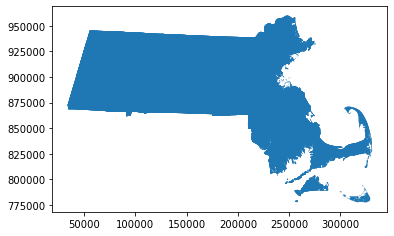

In [74]:
FinalData.plot()